# 问题一

┌ Info: Saved animation to d:\桌面\最优化方法1\作业3-王文杨-212101121\王文杨212101121.gif
└ @ Plots C:\Users\86183\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("d:\\桌面\\最优化方法1\\作业3-王文杨-212101121\\王文杨212101121.gif")
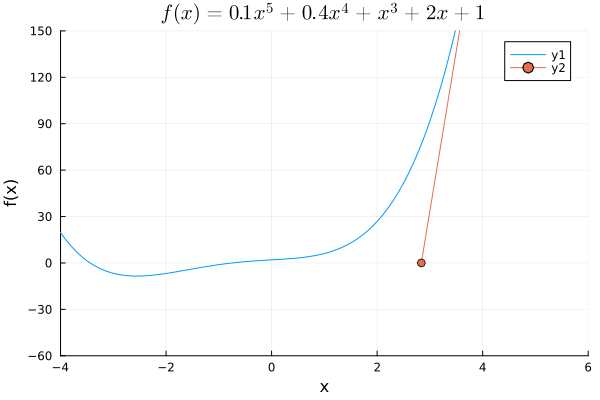

In [1]:
using Plots

# 定义函数
f(x) = 0.1 * x^5 + 0.4 * x^4 + x^2 + 2x + 1
# 求函数的导数和二阶导
df(x) = 0.1 * 5x^4 + 0.4 * 4x^3 + 2x + 2
d2f(x) = 0.1 * 5 * 4x^3 + 0.4 * 4 * 3x^2 + 2
# 牛顿迭代法的起始点
t = 4.0
function Newton_f(x, df, d2f)
    # 存储关于切线的值
    X = [x]
    Y = [df(x)]
    while abs(df(x))>1e-10
        G = d2f(x); g = df(x); d = -g/G; x += d
        plot!([], [], label="")
        push!(X,x); push!(Y, 0.0); push!(X,x); push!(Y, df(x))
    end
    return X,Y
end
X,Y = Newton_f(t, df, d2f)
x = -4:0.1:4
y = @.df(x)

n = length(X)

plot(x, y, xlabel="x", ylabel="f(x)",title="\$f(x) = 0.1x^5 + 0.4x^4 + x^3 + 2x + 1\$")
# 画 gif
anim = @animate for i in 1:n-1
    plot!(X[i:i+1],Y[i:i+1],xlims=(-4, 6), ylims=(-60, 150),markershape=:o)
end
gif(anim, "王文杨212101121.gif", fps = 1)

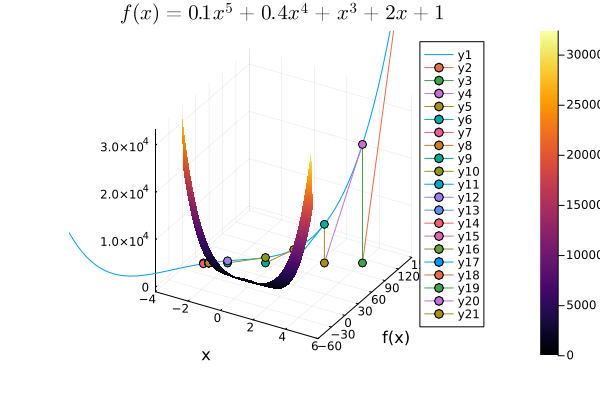

In [3]:
using Plots
f(x,y) = 100(y - x^2)^2 + (1 * x)^2
x = -4:0.1:4
y = -2:0.01:2
surface!(x,y,f)


# 问题二

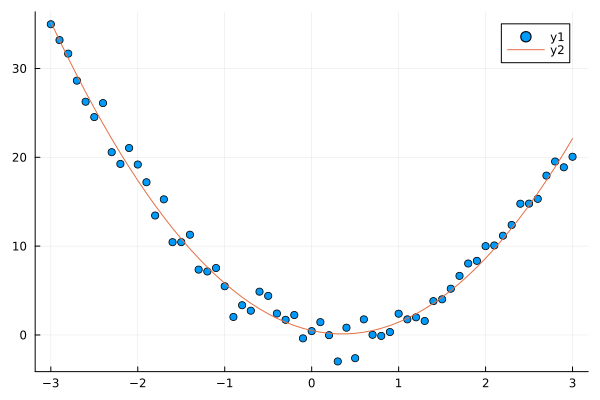

In [7]:
using Plots
# 生成二次函数的数据
x = -3:0.1:3
m = length(x)
y = 3 .* x.^2 .- 2 .* x .+ 1
y += 1.5 * randn(m)  # 数据噪声
n = 3; θ = randn(3);
X = [ones(m)'; x'; (x').^2]
alpha = 0.01
for i = 1:10000
    grad = X * (X' * θ - y) / m
    θ -= alpha * grad
end
scatter(x, y); pred = X' * θ; plot!(x, pred)


# 问题三

*求*
$$
\min J(\theta,x,y)=\frac{||\theta^Tx-y||^2}{2m}                                       
$$

*其中*
$$
\qquad \theta^Tx=[\theta_1x_1,\theta_2x_2,\theta_3x_3,\ldots,\theta_mx_m]   \\
y=[y_{1},y_{2},y_{3},\ldots,y_{2}]                                                     \\
$$

*对 $J$ 进行展开计算*
$$
\qquad\qquad\qquad\begin{aligned}
J&=\frac1{2m}(\theta^TX-y)^T(\theta^TX-y)                                           \\
&=\frac1{2m}(X^T\theta-y^T)(\theta^TX-y)                                                \\
&=\frac1{2m}(X^T\theta \theta^TX-X^T\theta y-y^T\theta^TX+ y^T- y)                     \\
\end{aligned}\\
$$

*则*
$$
\begin{aligned}
\frac{\partial J}{\partial\theta}
&=\frac1{2m}(2XX^T\theta-Xy^T-Xy^T)                                                     \\
&=\frac1m(XX^T\theta - Xy^T)                                                              \\
\end{aligned}\\
$$

*令*
$$
\frac{\partial J}{\partial\theta}=0   
$$

*即*
$$
XX^T\theta = Xy^T
$$

*得*
$$
\theta=(XX^{T})^{-1}Xy^T
$$

*又因为 $XX^T$ 往往不可逆，故常常加上扰动项*
$$
\theta=(XX^{T} + \lambda I)^{-1}Xy^T
$$


# 问题四

✐$\;\;\;$ **3.1** $\;$ Program the steepest descent and Newton algorithms using the backtracking line $\\$
search, Algorithm $3.1.$ Use them to minimize the Rosenbrock function $(2.22)$. Set the initial         $\\$
step length $\alpha_0 = 1$ and print the step length used by each method at each iteration. First try   $\\$
the initial point  $x_0 = (1.2, 1.2)^T$ and then the more difﬁcult starting point $x_0 = (−1.2, 1)^T .$

**Algorithm 3.1** (Backtracking Line Search). $\\$
$\;\;$ Choose $\bar{\alpha}>0,\rho\in(0,1),c\in(0,1);$ Set $\alpha\leftarrow\bar{\alpha}; \\$
$\;\;$ **repeat** until $f(x_{k}+\alpha p_{k})\leq f(x_{k})+c\alpha\nabla f_{k}^{T}p_{k}   \\$ 
$\;\;\qquad \;\;$  $\alpha\leftarrow\rho\alpha; \\$
$\;\;$ **end（repeat）**        $\\$
$\;\;$ Terminate with $\alpha_{k}=\alpha.$

